In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv(r"D:\My_Projects\Airline Dataset Updated - v2.csv\Airline Dataset Updated - v2.csv")

In [7]:
df.head()

,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
0,ABVWIg,Edithe,Leggis,Female,62,Japan,Coldfoot Airport,US,United States,NAM,North America,6/28/2022,CXF,Fransisco Hazeldine,On Time
1,jkXXAX,Elwood,Catt,Male,62,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,12/26/2022,YCO,Marla Parsonage,On Time
2,CdUz2g,Darby,Felgate,Male,67,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,1/18/2022,GNB,Rhonda Amber,On Time
3,BRS38V,Dominica,Pyle,Female,71,China,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,9/16/2022,YND,Kacie Commucci,Delayed
4,9kvTLo,Bay,Pencost,Male,21,China,Gillespie Field,US,United States,NAM,North America,2/25/2022,SEE,Ebonee Tree,On Time


In [8]:
df.isnull().sum()

Passenger ID            0
First Name              0
Last Name               0
Gender                  0
Age                     0
Nationality             0
Airport Name            0
Airport Country Code    0
Country Name            0
Airport Continent       0
Continents              0
Departure Date          0
Arrival Airport         0
Pilot Name              0
Flight Status           0
dtype: int64

In [9]:
df.shape

(98619, 15)

In [12]:
df.duplicated().sum()

0

In [36]:
status = df['Flight_Status'].value_counts(normalize=True)
print(status)

Flight_Status
Cancelled    0.334033
On Time      0.333060
Delayed      0.332907
Name: proportion, dtype: float64


In [30]:
def rename_col(s):
   
    s = s.replace(' ', '_')
    s = s.replace('-', '_')
    a = s.split('_')
    for i in range(len(a)):
        if not all([c == c.upper() for c in a[i]]):
            a[i] = a[i].capitalize()
    return '_'.join(a)

df.columns = [rename_col(c) for c in df.columns]
df.columns

Index(['Passenger_ID', 'First_Name', 'Last_Name', 'Gender', 'Age',
       'Nationality', 'Airport_Name', 'Airport_Country_Code', 'Country_Name',
       'Airport_Continent', 'Continents', 'Departure_Date', 'Arrival_Airport',
       'Pilot_Name', 'Flight_Status', 'Delayed', 'On_Time'],
      dtype='object')

In [31]:
df.head()

,Passenger_ID,First_Name,Last_Name,Gender,Age,Nationality,Airport_Name,Airport_Country_Code,Country_Name,Airport_Continent,Continents,Departure_Date,Arrival_Airport,Pilot_Name,Flight_Status,Delayed,On_Time
0,ABVWIg,Edithe,Leggis,Female,62,Japan,Coldfoot Airport,US,United States,NAM,North America,6/28/2022,CXF,Fransisco Hazeldine,On Time,False,True
1,jkXXAX,Elwood,Catt,Male,62,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,12/26/2022,YCO,Marla Parsonage,On Time,False,True
2,CdUz2g,Darby,Felgate,Male,67,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,1/18/2022,GNB,Rhonda Amber,On Time,False,True
3,BRS38V,Dominica,Pyle,Female,71,China,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,9/16/2022,YND,Kacie Commucci,Delayed,True,False
4,9kvTLo,Bay,Pencost,Male,21,China,Gillespie Field,US,United States,NAM,North America,2/25/2022,SEE,Ebonee Tree,On Time,False,True


<Axes: ylabel='Flight_Status'>

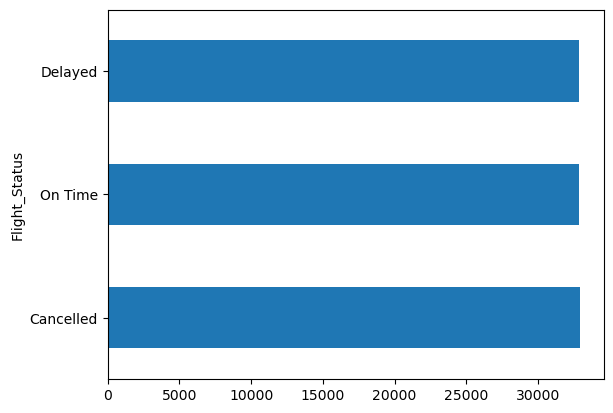

In [32]:
df.Flight_Status.value_counts().plot(kind='barh')

In [54]:
bins = [0, 12, 30, 50, 100] 

labels = ['Children', 'Youth', 'Adults', 'Seniors'] 

df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

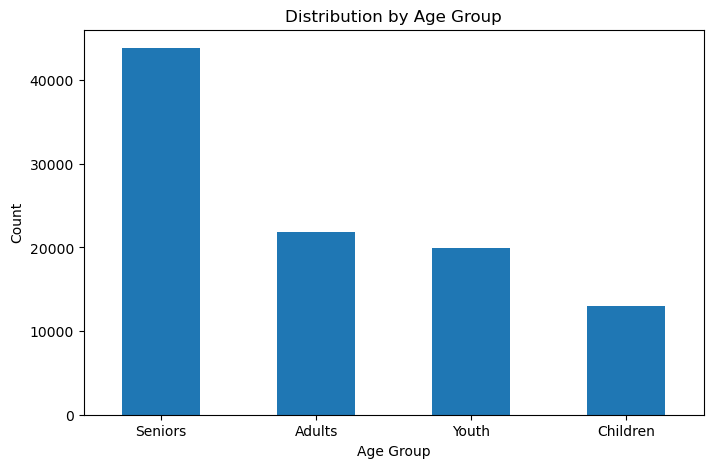

In [55]:
group_counts = df['Age Group'].value_counts()

plt.figure(figsize=(8, 5))
group_counts.plot(kind='bar', rot=0)
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.title("Distribution by Age Group")
plt.show()

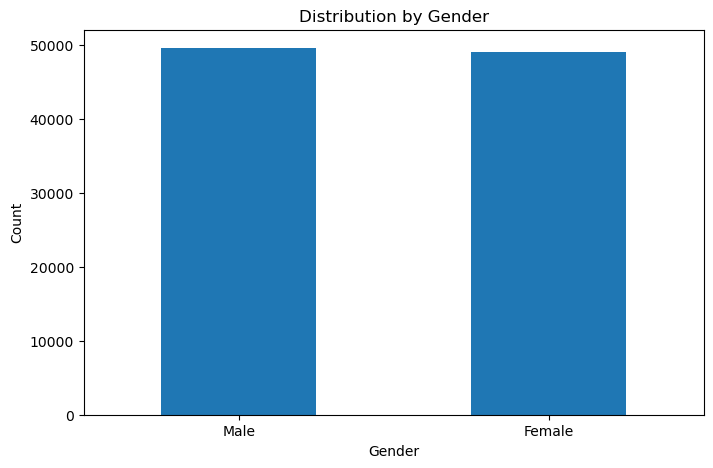

In [58]:
group_counts = df['Gender'].value_counts()

plt.figure(figsize=(8, 5))
group_counts.plot(kind='bar', rot=0)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Distribution by Gender")
plt.show()

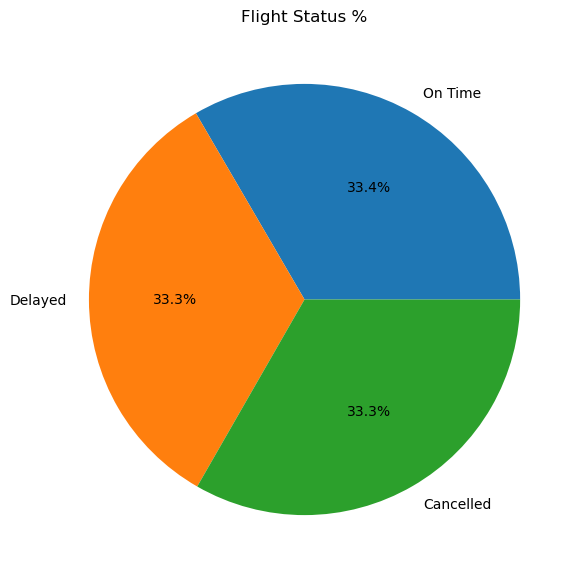

In [68]:
labels = df['Flight_Status'].unique()
plt.figure(figsize=(14,7))
plt.title('Flight Status %')
plt.pie(status,labels = labels,autopct='%1.1f%%')
plt.show()

In [42]:
country_visit = df['Country_Name'].value_counts().head(5)
print(country_visit)

Country_Name
United States       22104
Australia            6370
Canada               5424
Brazil               4504
Papua New Guinea     4081
Name: count, dtype: int64


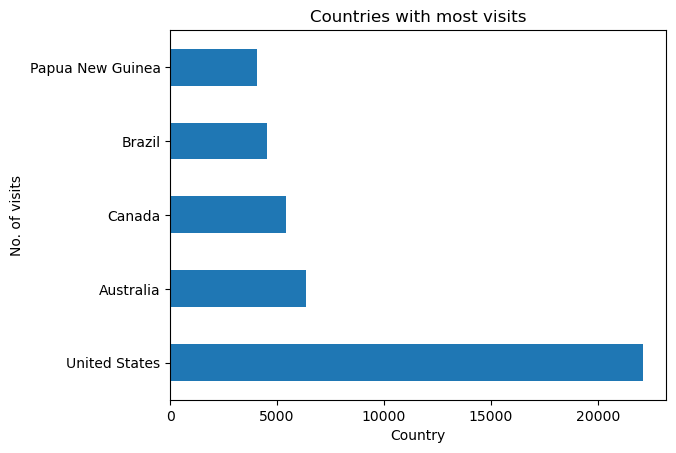

In [70]:
plt.Figure(figsize=(14,8))
country_visit.plot(kind='barh')
plt.title('Countries with most visits')
plt.xlabel("Country")
plt.ylabel("No. of visits")
plt.show()

In [44]:
continent = df['Continents'].value_counts().head()
print(continent)

Continents
North America    32033
Asia             18637
Oceania          13866
Europe           12335
Africa           11030
Name: count, dtype: int64


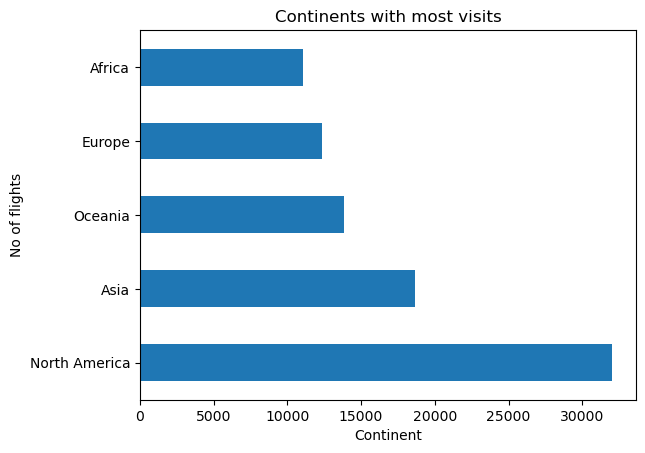

In [71]:
plt.Figure(figsize=(14,8))
continent.plot(kind='barh')
plt.title('Continents with most visits')
plt.xlabel('Continent')
plt.ylabel('No of flights')
plt.show()

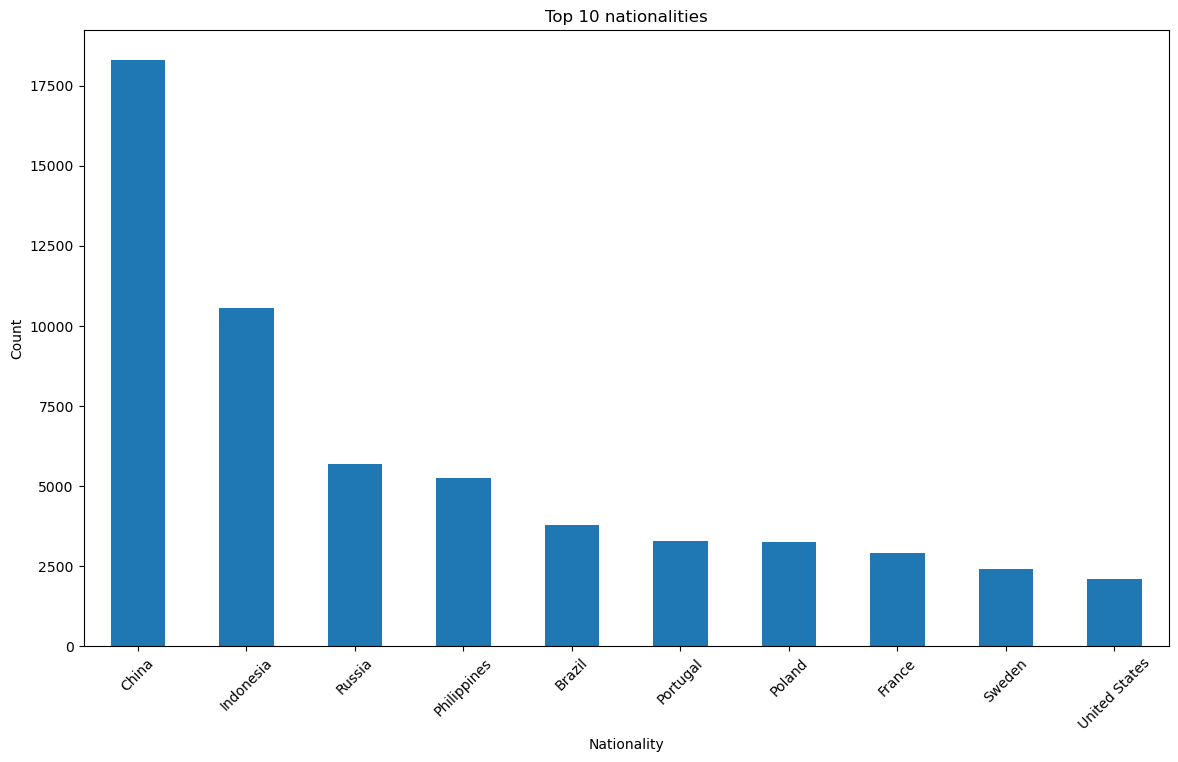

In [47]:
nationality = df["Nationality"].value_counts().head(10)

plt.figure(figsize=(14,8))
nationality.plot(kind="bar")
plt.title("Top 10 nationalities")
plt.xlabel("Nationality")
plt.ylabel("Count")
plt.xticks(rotation=45) 
plt.show()

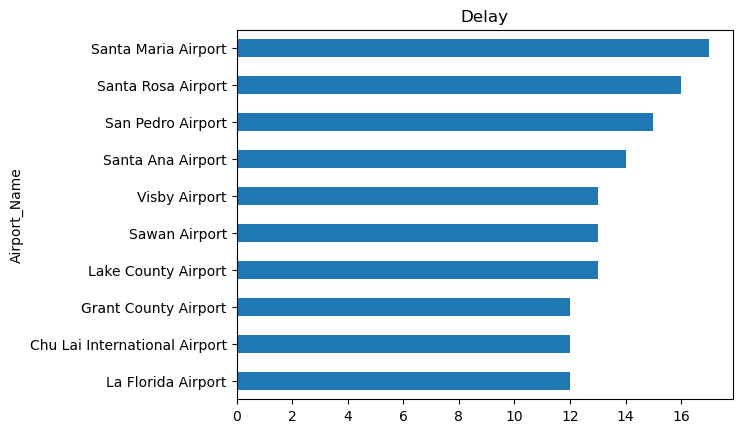

In [56]:
ax = df[df.Flight_Status=='Delayed'].Airport_Name.value_counts().nlargest(10).plot(kind='barh', title='Delay')
ax.invert_yaxis()

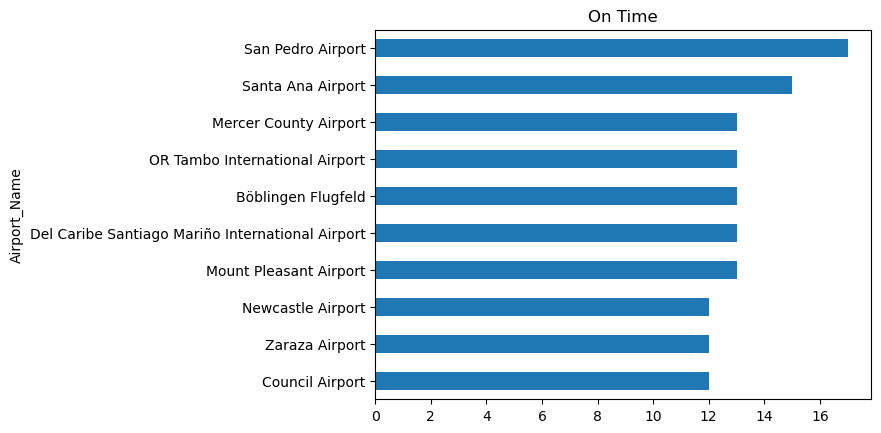

In [64]:
ax = df[df.Flight_Status=='On Time'].Airport_Name.value_counts().nlargest(10).plot(kind='barh', title='On Time')
ax.invert_yaxis()